<a href="https://colab.research.google.com/github/katrinag2004/ds3001assignments/blob/main/trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/ds4e/trees

Cloning into 'trees'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 119 (delta 14), reused 5 (delta 5), pack-reused 102 (from 1)
Receiving objects: 100% (119/119), 74.45 MiB | 12.41 MiB/s, done.
Resolving deltas: 100% (26/26), done.


1. How are trees constructed?
Trees are constructed recursively by splitting the data at each node based on the feature that best reduces impurity (e.g., Gini, entropy, variance). Each split creates two child nodes, and the process continues until a stopping criterion is met (like min_samples_leaf or max_depth).

2. How do trees handle non-linear relationships between variables? Compare this to linear models.
Trees naturally model non-linear relationships by splitting the data space into regions without assuming a functional form. In contrast, linear models assume a straight-line relationship between predictors and the target, which may underperform on complex patterns.

3. Why is the Gini a good loss function for categorical target variables?
The Gini index measures impurity: lower Gini means purer nodes. It’s computationally efficient and sensitive to changes in class distribution, making it a good choice for classification trees.

4. Why do trees tend to overfit, and how can this tendency be constrained?
They overfit by creating branches that capture noise. This is constrained with hyperparameters like max_depth, min_samples_leaf, or by pruning.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables.
False. While trees can handle categorical variables well (via one-hot encoding or direct splitting), they also perform well on numeric data, especially with complex, non-linear relationships.

6. Why don’t most versions of classification/regression trees allow more than two branches per split?
Binary splits are easier to implement, interpret, and optimize. Multivariate splits can introduce complexity and overfitting.

7. Heuristic ways to examine tree fit quality?
Look at tree depth, number of leaves, and accuracy vs. complexity plots. Overfit trees often have many deep branches and perfect train accuracy but poor test performance.

Best min_samples_leaf: 1
Decision Tree R²: 0.85191, RMSE: 130423.51
Linear Regression R²: 0.81992, RMSE: 143822.16


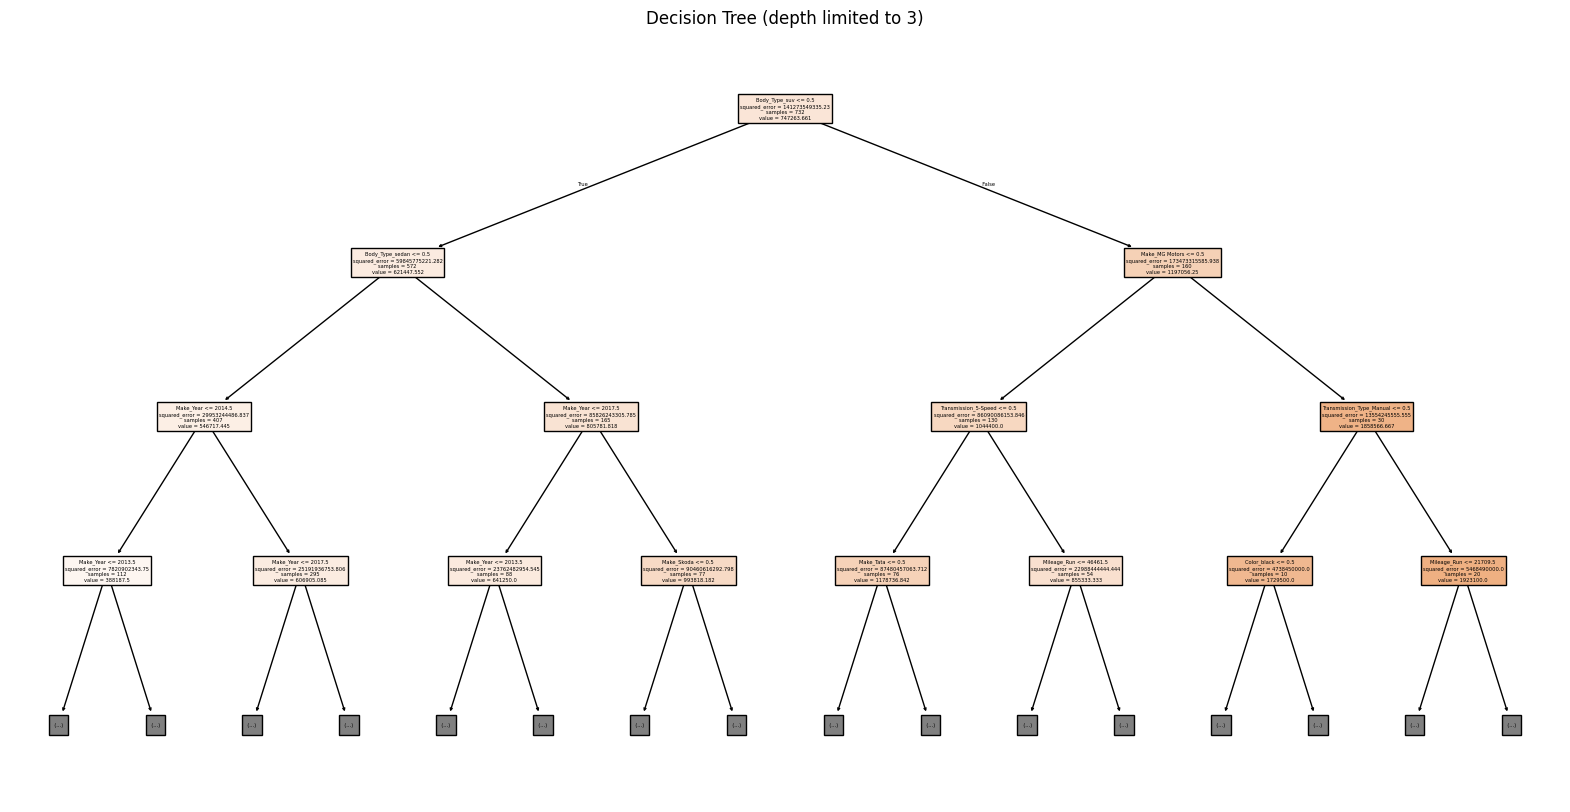

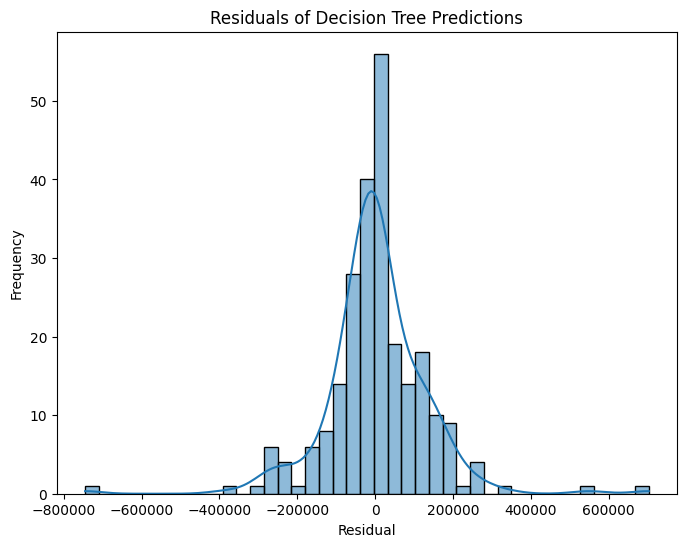

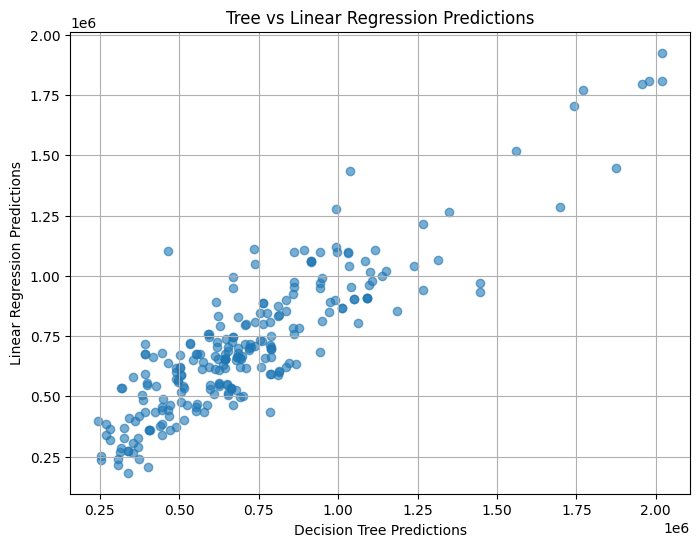

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load data
df = pd.read_csv("/content/cars_hw.csv")

# Select relevant features
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numeric_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target = 'Price'

# One-hot encode categoricals
X_cat = pd.get_dummies(df[categorical_vars], drop_first=True)
X_num = df[numeric_vars]
X = pd.concat([X_num, X_cat], axis=1)
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Search for best min_samples_leaf
best_r2 = -np.inf
best_leaf = 1
for leaf in range(1, 26):
    dt = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    dt.fit(X_train, y_train)
    r2 = r2_score(y_test, dt.predict(X_test))
    if r2 > best_r2:
        best_r2 = r2
        best_leaf = leaf

# Fit tree with best parameter
best_tree = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
best_tree.fit(X_train, y_train)
y_pred_tree = best_tree.predict(X_test)

# Tree metrics
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

# Residuals
residuals = y_test - y_pred_tree

# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Print metrics
print(f"Best min_samples_leaf: {best_leaf}")
print(f"Decision Tree R²: {r2_tree:.5f}, RMSE: {rmse_tree:.2f}")
print(f"Linear Regression R²: {r2_lr:.5f}, RMSE: {rmse_lr:.2f}")

# Plot dendrogram (simplified depth)
plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=X.columns, filled=True, max_depth=3)
plt.title("Decision Tree (depth limited to 3)")
plt.show()

# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals of Decision Tree Predictions")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Compare predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_tree, y_pred_lr, alpha=0.6)
plt.xlabel("Decision Tree Predictions")
plt.ylabel("Linear Regression Predictions")
plt.title("Tree vs Linear Regression Predictions")
plt.grid(True)
plt.show()


 How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

976 observations and 12 variables total.


Use a train-test split to iterate over possible values for min_samples_leaf, computing the
 for each value between 1 and 25. What choice achieves the highest
 on the test data?

 What is your
 and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.